In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from pandas_profiling import ProfileReport

In [276]:
municipios = pd.read_excel("Dados/Municipios/lista-1262municipios-semiarido-2017.xlsx")
municipios = municipios.rename(columns=municipios.iloc[1])
municipios = municipios.drop([0, 1]).reset_index(drop=True)
municipios = municipios.drop('#', axis=1).reset_index(drop=True)

In [207]:
idh_tot = pd.read_csv("Dados/Registros_Administrativos/dados_registros_administrativos_total_2012_2027.csv")
idh_leg = pd.read_csv("Dados/Registros_Administrativos/dados_registros_administrativos_LEGENDA.csv")

In [208]:
censo = pd.read_csv("Dados/Censo/Censo_municipal_estadual_nacional-MUN91-00-10.csv")
censo = censo[(censo['Codmun7'].isin(municipios['Cod IBGE']))]
censo_siglas = pd.read_csv("Dados/Censo/Censo_municipal_estadual_nacional-Siglas.csv")

In [209]:
alagoas = pd.read_csv("Dados/Dados IBGE/Alagoas.csv")
bahia = pd.read_csv("Dados/Dados IBGE/Bahia.csv")
ceara = pd.read_csv("Dados/Dados IBGE/Ceara.csv")
maranhao = pd.read_csv("Dados/Dados IBGE/Maranhao.csv")
minas_gerais = pd.read_csv("Dados/Dados IBGE/Minas Gerais.csv")
paraiba = pd.read_csv("Dados/Dados IBGE/Paraiba.csv")
pernambuco = pd.read_csv("Dados/Dados IBGE/Pernambuco.csv")
piaui = pd.read_csv("Dados/Dados IBGE/Piaui.csv")
rio_grande_do_norte = pd.read_csv("Dados/Dados IBGE/Rio Grande do Norte.csv")
sergipe = pd.read_csv("Dados/Dados IBGE/Sergipe.csv")

dados_ibge = pd.concat([alagoas, bahia, ceara, maranhao, minas_gerais, paraiba, pernambuco, piaui, rio_grande_do_norte, sergipe], ignore_index=True)
dados_ibge = dados_ibge[(dados_ibge['Munic&iacute;pio [-]'].isin(municipios['Cod IBGE']))]

In [210]:
idh_tot_to_merge = idh_tot.drop_duplicates(subset='IBGE7', keep='last').reset_index(drop=True)
censo_to_merge = censo.drop_duplicates(subset='Codmun7', keep='last').reset_index(drop=True)
censo_idh_merged = pd.merge(idh_tot_to_merge[['IBGE7', 'NOME', 'POP_TOT']], censo_to_merge[['Codmun7', 'IDHM', 'IDHM_E', 'IDHM_L', 'IDHM_R']], left_on='IBGE7', right_on='Codmun7', how='inner')
df = censo_idh_merged.drop('Codmun7', axis=1)
df = df.sort_values(by='IBGE7')

In [211]:
censo_sorted = censo.sort_values(by=['ANO', 'Codmun7']).reset_index(drop=True)
censo_sorted['CRESCIMENTO_IDHM'] = censo_sorted.groupby('Codmun7')['IDHM'].pct_change()
censo_sorted = censo_sorted.dropna().reset_index(drop=True)
censo_sorted = censo_sorted.sort_values(by='Codmun7')
df['CRESCIMENTO_IDHM'] = censo_sorted['CRESCIMENTO_IDHM']

In [214]:
dados_ibge = dados_ibge.sort_values(by='Munic&iacute;pio [-]').reset_index(drop=True)
df['AREA_KM²'] = dados_ibge['Prefeito [2021]']
df['POP/KM²'] = dados_ibge['Popula&ccedil;&atilde;o residente - pessoas [2022]']

In [213]:
censo_siglas[(censo_siglas['SIGLA'].isin(['PIA18M']))]

,SIGLA,NOME CURTO,NOME LONGO,DEFINIÇÃO
228,PIA18M,População de 18 anos ou mais,População de 18 anos ou mais em idade ativa,População residente nessa faixa etária


In [217]:
df[(df['IBGE7'].isin([2602803, 2607000, 2308104, 2708402]))].sort_values(by=['CRESCIMENTO_IDHM'])

,IBGE7,NOME,POP_TOT,IDHM,IDHM_E,IDHM_L,IDHM_R,CRESCIMENTO_IDHM,AREA_KM²,POP/KM²
753,2607000,Inajá,22801,0.523,0.400,0.711,0.503,0.294554,1231.362,20.79
290,2308104,Mauriti,46548,0.605,0.526,0.772,0.544,0.359551,1079.011,42.22
722,2602803,Buíque,57696,0.527,0.395,0.746,0.497,0.397878,1336.544,38.98
861,2708402,São José da Tapera,32626,0.527,0.409,0.703,0.508,0.652038,490.879,62.35


In [220]:
df[df['IDHM'] <= 0.5].sort_values(by='IDHM_E')

,IBGE7,NOME,POP_TOT,IDHM,IDHM_E,IDHM_L,IDHM_R,CRESCIMENTO_IDHM,AREA_KM²,POP/KM²
52,2202729,Cocal dos Alves,6054,0.498,0.315,0.779,0.504,0.886364,324.856,19.66
840,2703304,Inhapi,18652,0.484,0.316,0.718,0.501,0.722420,372.019,40.77
1016,2916500,Itapicuru,36211,0.486,0.319,0.711,0.505,0.562701,1557.685,20.34
49,2202653,Caxingó,5330,0.488,0.329,0.708,0.498,0.827715,491.093,11.19
50,2202703,Cocal,27338,0.497,0.334,0.712,0.516,0.557994,1294.133,21.80
151,2209658,São Francisco de Assis do Piauí,5657,0.485,0.336,0.734,0.462,1.012448,1072.311,5.20
23,2201739,Betânia do Piauí,6106,0.489,0.342,0.702,0.486,0.902724,579.576,10.73
851,2706000,Olivença,11772,0.493,0.345,0.677,0.513,0.637874,175.288,61.68
769,2609154,Manari,21047,0.487,0.354,0.682,0.477,0.650847,344.685,68.94
14,2201051,Assunção do Piauí,7717,0.499,0.382,0.706,0.462,0.463343,1690.703,4.41


In [255]:
df[(df['POP_TOT'] >= 0) & (df['IDHM'] < 1)].sort_values(by='POP/KM²', ascending=False)

,IBGE7,NOME,POP_TOT,IDHM,IDHM_E,IDHM_L,IDHM_R,CRESCIMENTO_IDHM,AREA_KM²,POP/KM²
817,2615409,Toritama,44189,0.618,0.452,0.797,0.655,0.284823,25.704,1600.41
281,2307304,Juazeiro do Norte,270383,0.694,0.642,0.810,0.644,0.275735,258.788,1105.62
555,2504009,Campina Grande,410332,0.720,0.654,0.812,0.702,0.198003,591.658,708.82
827,2700300,Arapiraca,234185,0.649,0.549,0.780,0.638,0.363445,345.655,678.99
180,2211001,Teresina,850198,0.751,0.707,0.820,0.731,0.211290,1391.293,622.66
...,...,...,...,...,...,...,...,...,...,...
41,2202251,Canavieira,3892,0.583,0.485,0.778,0.525,0.502577,2165.277,1.58
62,2203230,Currais,4871,0.542,0.438,0.743,0.490,0.598820,3156.657,1.53
172,2210631,Sebastião Leal,4224,0.562,0.467,0.736,0.516,0.523035,3148.857,1.41
81,2204550,Guaribas,4489,0.508,0.381,0.711,0.483,1.373832,3118.231,1.37


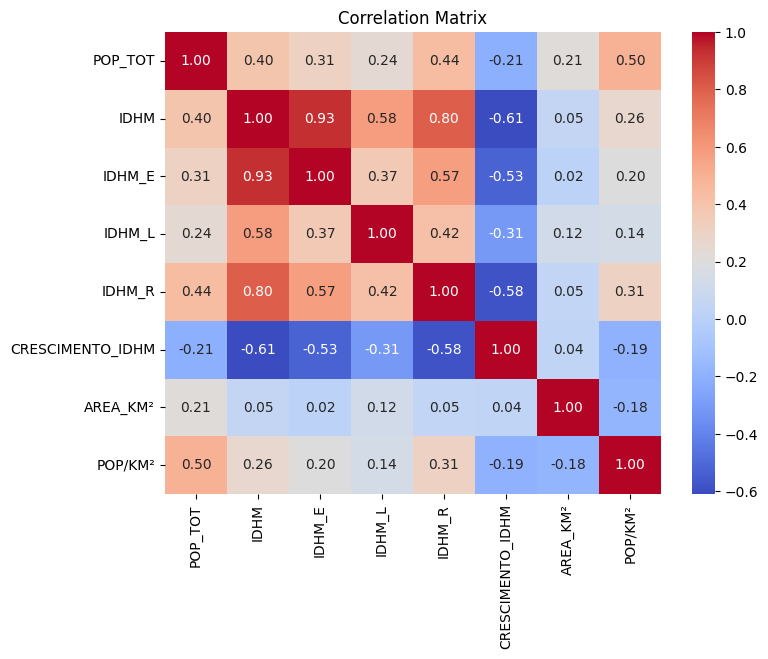

In [268]:
correlation_df = df.copy()
correlation_df = correlation_df.drop('IBGE7', axis=1)
correlation_df = correlation_df.drop('NOME', axis=1)
correlation_matrix = correlation_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Text(0, 0.5, 'ESCOLARIZAÇÃO')

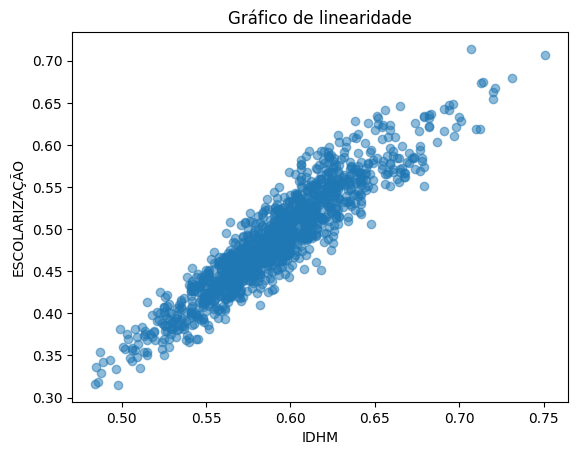

In [286]:
x = df['IDHM']
y = df['IDHM_E']

plt.scatter(x, y, alpha=0.5)
plt.title('Gráfico de linearidade')
plt.xlabel('IDHM')
plt.ylabel('ESCOLARIZAÇÃO')